# Capstone Project

Health and Nutrition Data from CDC and NHANES

In [2]:
import pandas as pd #importing pandas 
#pd.set_option('display.max_rows', None) 

In [3]:
# reading the dataset from cdc
demo = pd.read_csv("../data/NHANES_2015-2016/demographics2015.csv")
diet = pd.read_csv("../data/NHANES_2015-2016/dietary2015.csv")
exam = pd.read_csv("../data/NHANES_2015-2016/examination2015.csv")
lab = pd.read_csv("../data/NHANES_2015-2016/laboratory2015.csv")
quest = pd.read_csv("../data/NHANES_2015-2016/questionnaire2015.csv")

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/407503766.py:4: DtypeWarning: Columns (70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  exam = pd.read_csv("../data/NHANES_2015-2016/examination2015.csv")
/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/407503766.py:6: DtypeWarning: Columns (758,759,776,777) have mixed types. Specify dtype option on import or set low_memory=False.
  quest = pd.read_csv("../data/NHANES_2015-2016/questionnaire2015.csv")


In [4]:
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
0,83732.0,92670.699919,69945.934107,1.0,71.0,2.0,2.0,0.0,1.0,1.0,...,20.0,50.00,4.2,11.0,0.5,30.0,290.0,19.0,NaN,150.0
1,83733.0,16454.105994,13190.268870,1.0,61.0,2.0,2.0,17.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83734.0,6529.619788,4928.422423,1.0,14.0,2.0,2.0,6.0,7.0,1.0,...,NaN,140.00,NaN,15.0,2.0,NaN,NaN,110.0,NaN,NaN
3,83735.0,58191.539622,0.000000,1.0,22.0,2.0,1.0,15.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83736.0,12358.085471,9813.677587,1.0,73.0,2.0,2.0,2.0,7.0,1.0,...,NaN,6.67,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# demo_var = pd.read_excel("../data/demographics_variables.xlsx").iloc[:,0:2]

# diet_var = pd.read_excel("../data/dietary_variables.xlsx").iloc[:,0:2]

# exam_var = pd.read_excel("../data/examination_variables.xlsx")

# lab_var = pd.read_excel("../data/laboratory_variables.xlsx")

# quest_var = pd.read_excel("../data/questionnaire_variables.xlsx")

# Data Clean-up

We want only certain variables!

Demographic data filtering

In [6]:

#Demogrpahics data filtering

demo_clean = demo.loc[:,[
    "SEQN",                 # ID
    "RIAGENDR",             # Gender
    "RIDAGEYR",             # Age
    "RIDRETH3",             # Ethnicity
    "DMDBORN4",             # Country of Birth
    "DMDCITZN",             # US-Citizenship
    "DMDEDUC2",             # Highschool Grad?
    "DMDEDUC3",             # College Degree?
    "DMDHHSIZ",             # Household Size
    "DMDHHSZA",             # No of Kids < 6 yr in Household?
    "DMDHHSZB",             # No of Kids between 6 and 17
    "INDFMIN2",             # Total family Income
    "RIDEXPRG"              # Pregnancy status
    ]]
demo_columns = {
    "SEQN" : "ID",
    "RIAGENDR": "gender",
    "RIDAGEYR": "age",
    "RIDRETH3": 'ethnicity',
    "DMDBORN4": "country_of_birth",
    "DMDCITZN": "us_citizen",
    "DMDEDUC2": "education_adult",
    "DMDEDUC3": "education_adolescent",
    "DMDHHSIZ": "household_size",
    "DMDHHSZA": "no_of_kids_u6",
    "DMDHHSZB": "no_of_kids_btw_6_17",
    "INDFMIN2": "total_income",
    "RIDEXPRG": "pregnancy_status"
    }
demo_clean.rename(columns=demo_columns, inplace = True)


Dietary data filtering

In [7]:
diet_clean = diet.loc[:,[
    'SEQN',                 # ID
    'DR1TKCAL',             # Total Calories
    'DR1TPROT',             # Total Protein
    'DR1TCARB',             # Total Carbohydrates
    'DR1TSUGR',             # Total Sugar
    'DR1_320Z',             # Total Water drank
    'DR1TTFAT',             # Total Fat
    'DR1TMFAT',             # MUFA
    'DR1TPFAT',             # PUFA
    'DR1TCHOL',             # Cholesterin
    'DR1TFIBE',             # Total Fiber
    'DR1TALCO',             # Total Alcohol
    'DR1TVARA',             # Vit A
    'DR1TVB1',              # Vit B1 (Thiamin)
    'DR1TVB2',              # Vit B2 (Riboflavin)
    'DR1TNIAC',             # Vit B3 (Niacin)
    'DR1TVB6',              # Vit B6 (Pyridoxin)
    'DR1TFA',               # Vit B9 (Folic Acid)
    'DR1TVB12',             # Vit B12 (Cobalamin)
    'DR1TVC',               # Vit C
    'DR1TVD',               # Vit D
    'DR1TATOC',             # Vit E
    'DR1TCALC',             # Calcium
    'DR1TIRON',             # Iron
    'DR1TZINC',             # Zinc
    'DR1TSODI',             # Sodium
    'DR1TPOTA',             # Potassium
    'DR1TCAFF'              # Caffeine
    ]]

diet_columns = {
    'SEQN': 'ID',
    'DR1TKCAL': 'daily_calories',
    'DR1TPROT': 'total_protein',
    'DR1TCARB': 'total_carbohydrates',
    'DR1TSUGR': 'total_sugar',
    'DR1_320Z': 'total_water',
    'DR1TTFAT': 'total_fat',
    'DR1TMFAT': 'mufa',
    'DR1TPFAT': 'pufa',
    'DR1TCHOL': 'cholesterin_diet',
    'DR1TFIBE': 'total_fiber',
    'DR1TALCO': 'total_alcohol',
    'DR1TVARA': 'vit_a',
    'DR1TVB1': 'vit_b1',
    'DR1TVB2': 'vit_b2',
    'DR1TNIAC': 'vit_b3',
    'DR1TVB6': 'vit_b6',
    'DR1TFA': 'vit_b9',
    'DR1TVB12': 'vit_b12',
    'DR1TVC': 'vit_c',
    'DR1TVD': 'vit_d_diet',
    'DR1TATOC': 'vit_e',
    'DR1TCALC': 'calcium',
    'DR1TIRON': 'iron',
    'DR1TZINC': 'zinc',
    'DR1TSODI': 'sodium',
    'DR1TPOTA': 'potassium',
    'DR1TCAFF': 'caffeine'
}

diet_clean.rename(columns=diet_columns, inplace = True)


Examination data filter

In [8]:
exam_clean = exam.loc[:,[
    'SEQN',                 # ID
    'BMXWT',                # Weight
    'BMXHT',                # Height
    'BMXBMI',               # BMI
    'BMXWAIST',             # Waist circumference
    'BPXSY1',               # Systolic BP
    'BPXDI1',               # Diastolic BP
    'BPXPULS'               # Pulse
    ]]

exam_columns = {
    'SEQN': 'ID',
    'BMXWT': 'weight',
    'BMXHT': 'height',
    'BMXBMI': 'bmi',
    'BMXWAIST': 'waist_circumference',
    'BPXSY1': 'systolic_bp',
    'BPXDI1': 'diastolic_bp',
    'BPXPULS': 'pulse'
}

exam_clean.rename(columns=exam_columns, inplace = True)


Laboratory data filtering

In [9]:
lab_clean = lab.loc[:,[
    'SEQN',             # ID
    'LBXGLU',           # Glucose in Blood mg/dL
    'LBDINSI',          # Insulin pmol/L
    'LBXTC',            # Cholesterol mg/dL
    'LBXTR',            # Triglyceride mg/dL
    'LBDLDL',           # LDL-cholesterol mg/dL
#   'LBXSAL',           # Albumin
#   'LBXSATSI',         # Alanine Aminotransferase ALT U/L
    'LBXSGTSI',         # Gamma glutamyl transferase
    'LBXSAPSI',         # Alkaline phosphatase (IU/L)
    'LBXVIDMS',         # vitamin D2 + D3
    'URXUCR',           # Urinary creatinine (mg/dL)
    'URXUMA',           # Albumin, urine (ug/mL)
    'URDACT'            # Albumin creatinine ratio (mg/g)
]]

lab_columns = {
    'SEQN': 'ID',
    'LBXGLU': 'blood_glucose',
    'LBDINSI': 'insulin',
    'LBXTC': 'cholesterin_lab',
    'LBXTR': 'triaclyglycerole',
    'LBDLDL': 'ldl',
#   'LBXSAL': 'albumin',
#   'LBXSATSI': 'ALT',
    'LBXSGTSI': 'gamma_glutamyl_transferase',
    'LBXSAPSI': 'alkaline_phosphatase',
    'LBXVIDMS': 'vit_d_lab',
    'URXUCR': 'urinary_creatinine',
    'URXUMA': 'albumine',
    'URDACT': 'albumine_creatinine_ratio'
}

lab_clean.rename(columns=lab_columns, inplace = True)

Questionaire data fltering

In [10]:
quest_clean = quest.loc[:,[
    'SEQN',                 # ID
    'PAQ620',               # Work with physical activity?
    'PAD680',               # Time spent sitting
    'PAD675',               # Time spent doing physical activities / day
    'PAQ640',               # Days on which you bike or walk more than 10 mins/week
    'MCQ010',               # Asthma?
    'MCQ080',               # Has a Doctor ever said: "you are overweight!" ?
    'MCQ220',               # Has a Doctor ever said: "You have cancer" ?
    'SMQ040',               # Do you smoke?
    'ALQ130',               # On avg how many drinks on days you drank alcohol?
    'SLQ050',               # Ever told a doctor: Trouble sleeping?
    'DIQ010'                # Has a Doctor ever told you: "You have Diabetes"?
    ]]


quest_columns = {
    'SEQN': 'ID',
    'PAQ620': 'physical_activity_work',
    'PAD680': 'sitting_per_day',
    'ALQ130': 'alcoholic_drinks',
    'SMQ040': 'smoker',
    'PAD675': 'sport_days',
    'PAQ640': 'walk_<10_minutes_p_day',
    'MCQ010': 'asthma',
    'MCQ080': 'overweight',
    'MCQ220': 'cancer',
    'SLQ050': 'trouble_sleeping',
    'DIQ010': 'diabetes'
}
quest_clean.rename(columns=quest_columns, inplace = True)

Checking for Duplicates

In [11]:
print(demo_clean.shape)
print(demo_clean.duplicated().value_counts())

(9971, 13)
False    9971
Name: count, dtype: int64


In [12]:
print(exam_clean.shape)
print(exam_clean.duplicated().value_counts())

(9544, 8)
False    9544
Name: count, dtype: int64


In [13]:
print(quest_clean.shape)
print(quest_clean.duplicated().value_counts())

(9971, 12)
False    9971
Name: count, dtype: int64


In [14]:
print(diet_clean.shape)
print(diet_clean.duplicated().value_counts())

(9971, 28)
False    9971
Name: count, dtype: int64


In [15]:
print(lab_clean.shape)
print(lab_clean.duplicated().value_counts())

(9544, 12)
False    9544
Name: count, dtype: int64


Merging all dataframes

In [16]:

data_merged = demo_clean.merge(diet_clean, how = 'inner', on="ID").merge(exam_clean, how='inner', on='ID').merge(lab_clean, how='inner', on='ID').merge(quest_clean, how='inner', on='ID')

In [59]:
data_merged.columns

Index(['ID', 'gender', 'age', 'ethnicity', 'country_of_birth', 'us_citizen',
       'education_adult', 'education_adolescent', 'household_size',
       'no_of_kids_u6', 'no_of_kids_btw_6_17', 'total_income',
       'pregnancy_status', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'mufa', 'pufa', 'cholesterin_diet', 'total_fiber', 'total_alcohol',
       'vit_a', 'vit_b1', 'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12',
       'vit_c', 'vit_d_diet', 'vit_e', 'calcium', 'iron', 'zinc', 'sodium',
       'potassium', 'caffeine', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'pulse',
       'blood_glucose', 'insulin', 'cholesterin_lab', 'triaclyglycerole',
       'ldl', 'gamma_glutamyl_transferase', 'alkaline_phosphatase',
       'vit_d_lab', 'urinary_creatinine', 'albumine',
       'albumine_creatinine_ratio', 'physical_activity_work',
       'sitting_per_day', 'sport_days', 'w

# De-encode Result-values

In [18]:
missing = data_merged.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

pregnancy_status          8304
walk_<10_minutes_p_day    7823
smoker                    7225
education_adolescent      6998
ldl                       6845
                          ... 
diabetes                   379
total_income               267
pulse                      230
weight                      99
us_citizen                   2
Length: 61, dtype: int64


In [19]:
int_list = [
    "ID", "age", "no_of_kids_u6", "household_size",
    "no_of_kids_btw_6_17",
    "sport_days", "sitting_per_day",
    "walk_<10_minutes_p_day", "alcoholic_drinks"
]

data_merged.loc[:,int_list] = data_merged.loc[:,int_list].astype('Int64')

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/194377051.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[  30, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 ...
 <NA>, <NA>, <NA>,   45, <NA>, <NA>, <NA>, <NA>, <NA>,   60]
Length: 9544, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_merged.loc[:,int_list] = data_merged.loc[:,int_list].astype('Int64')
/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/194377051.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[ 480,  300,  480,  480,  540,   10, <NA>, <NA>, <NA>,  540,
 ...
 <NA>, <NA>,  360,  660,  600, <NA>, <NA>,  600, <NA>,  600]
Length: 9544, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_mer

In [20]:
# 777, 7777, 999 & 9999 are unknown or refused to say. for simplicity purposes we set all of these to 0
data_merged.replace([777, 999, 7777, 9999], 0, inplace=True)

In [21]:
str_list = [
       'gender',
       'country_of_birth',
       'us_citizen',
       'ethnicity',
       'education_adult',
       'education_adolescent',
       'pregnancy_status',
       'physical_activity_work',
       'asthma',
       'overweight',
       'cancer',
       'smoker',
       'trouble_sleeping',
       'diabetes']
data_merged[str_list] = data_merged[str_list].astype('str')



In [22]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9544 non-null   float64
 1   gender                      9544 non-null   object 
 2   age                         9544 non-null   float64
 3   ethnicity                   9544 non-null   object 
 4   country_of_birth            9544 non-null   object 
 5   us_citizen                  9544 non-null   object 
 6   education_adult             9544 non-null   object 
 7   education_adolescent        9544 non-null   object 
 8   household_size              9544 non-null   float64
 9   no_of_kids_u6               9544 non-null   float64
 10  no_of_kids_btw_6_17         9544 non-null   float64
 11  total_income                9277 non-null   float64
 12  pregnancy_status            9544 non-null   object 
 13  daily_calories              8327 

In [23]:
# country of birth:
# 1: born in usa
# 2: others
# 77 refused
# 99 dont know
# . missing

data_merged['country_of_birth'] = data_merged['country_of_birth'].map({
    '1.0': 'USA',
    '2.0': 'others'
}).fillna('unknown')

data_merged['country_of_birth']

0          USA
1       others
2          USA
3          USA
4          USA
         ...  
9539       USA
9540       USA
9541    others
9542       USA
9543       USA
Name: country_of_birth, Length: 9544, dtype: object

In [24]:
# citizen:\
# 1 born in the usa\
# 2 durch einbürgerung\
# 7 kein us-bürger\
# 9 keine angabe

data_merged['us_citizen'] = data_merged['us_citizen'].map({
    '1.0': 'US-citizen',
    '2.0': 'US-citizen',
    '7.0': 'not a citizen',
    '9.0': 'unknown'
}).fillna('unknown')
data_merged['us_citizen'].value_counts()

us_citizen
US-citizen       9527
unknown             9
not a citizen       8
Name: count, dtype: int64

In [25]:
# pregnancy status:\
# 1: yes\
# 2: not pregnant at exam\
# 3: unsure

data_merged['pregnancy_status'] = data_merged['pregnancy_status'].map({
    '1.0': 'pregnant',
    '2.0': 'not pregnant',
    '3.0': 'unknown'
}).fillna('unknown')
data_merged['pregnancy_status'].value_counts()


pregnancy_status
unknown         8349
not pregnant    1125
pregnant          70
Name: count, dtype: int64

In [26]:
# physical activity at work\
# 1 yes\
# 2 no\
# 7 refused\
# 9 dont know\
# . missing

data_merged['physical_activity_work'] = data_merged['physical_activity_work'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')
data_merged['physical_activity_work'].value_counts()

physical_activity_work
no         4186
unknown    2847
yes        2511
Name: count, dtype: int64

In [27]:
# SMQ040 - smoker
# 1 every day
# 2 some days
# 3 not at all
# 7 refused
# 9 dont know
# . missing

data_merged['smoker'] = data_merged['smoker'].map({
    '1.0': 'every day',
    '2.0': 'some days',
    '3.0': 'not at all',
    '9.0': 'unknown',
    '7.0': 'unknown'
}).fillna('unknown')

data_merged['smoker'].value_counts()

smoker
unknown       7225
not at all    1264
every day      798
some days      257
Name: count, dtype: int64

In [28]:
# MCQ080 - overweight
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing
data_merged['overweight'] = data_merged['overweight'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['overweight'].value_counts()

overweight
no         3915
unknown    3485
yes        2144
Name: count, dtype: int64

In [29]:
# MCQ220 - cancer
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['cancer'] = data_merged['cancer'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['cancer'].value_counts()

cancer
no         4945
unknown    4074
yes         525
Name: count, dtype: int64

In [30]:
# MCQ010 asthma
# 1 - yes
# 2- no
# 3- refused
# 9 dont know
# . missing

data_merged['asthma'] = data_merged['asthma'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['asthma'].value_counts()

asthma
no         7778
yes        1376
unknown     390
Name: count, dtype: int64

In [31]:
# DIQ010 - diabetes
# 1 yes
# 2 no
# 3 borderline
# 7 ref
# 9 dont know
# . missing

data_merged['diabetes'] = data_merged['diabetes'].map({
    '1.0': 'yes',
    '2.0': 'no',
    '3.0': 'refused',
    '9.0': 'unknown'
}).fillna('unknown')

data_merged['diabetes'].value_counts()

diabetes
no         8200
yes         820
unknown     383
refused     141
Name: count, dtype: int64

In [32]:
# ethnicity
# 1.0 mexican american
# 2.0 other hispanic
# 3.0 non-hispanic white
# 4.0 non-hispanic black
# 6.0 asian
# 7.0 others 

data_merged['ethnicity'] = data_merged['ethnicity'].map({
    '1.0': 'mexican american',
    '2.0': 'hispanic',
    '3.0': 'white',
    '4.0': 'black',
    '6.0': 'asian',
    '7.0': 'others'
}).fillna('unknown')
data_merged['ethnicity'].value_counts()

ethnicity
white               2948
black               2052
mexican american    1837
hispanic            1232
asian                986
others               489
Name: count, dtype: int64

In [33]:
data_merged['education_adult'] = data_merged['education_adult'].map({
    '1.0': '<9th',
    '2.0': '9-11th',
    '3.0': 'GED Grad',
    '4.0': 'some College deg',
    '5.0': 'College or abv',
    '7.0': 'unknown',
    '9.0': 'unknown'
}).fillna('unknown')

In [99]:
data_merged.columns

Index(['ID', 'gender', 'age', 'ethnicity', 'country_of_birth', 'us_citizen',
       'education_adult', 'education_adolescent', 'household_size',
       'no_of_kids_u6', 'no_of_kids_btw_6_17', 'total_income',
       'pregnancy_status', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'mufa', 'pufa', 'cholesterin_diet', 'total_fiber', 'total_alcohol',
       'vit_a', 'vit_b1', 'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12',
       'vit_c', 'vit_d_diet', 'vit_e', 'calcium', 'iron', 'zinc', 'sodium',
       'potassium', 'caffeine', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'pulse',
       'blood_glucose', 'insulin', 'cholesterin_lab', 'triaclyglycerole',
       'ldl', 'gamma_glutamyl_transferase', 'alkaline_phosphatase',
       'vit_d_lab', 'urinary_creatinine', 'albumine',
       'albumine_creatinine_ratio', 'physical_activity_work',
       'sitting_per_day', 'sport_days', 'w

# Ploting 

<Axes: xlabel='us_citizen', ylabel='weight'>

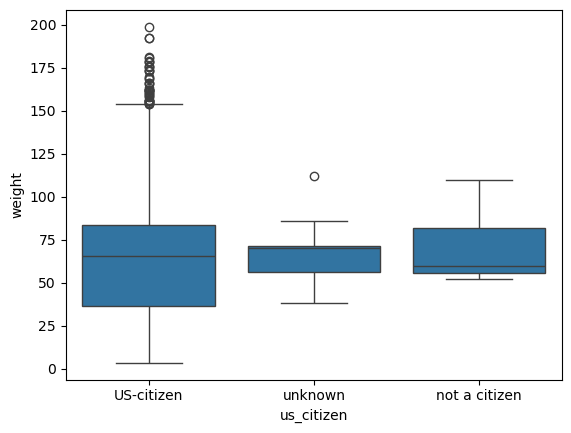

In [35]:
import seaborn as sns

sns.boxplot(data= data_merged, x = 'us_citizen', y='weight')

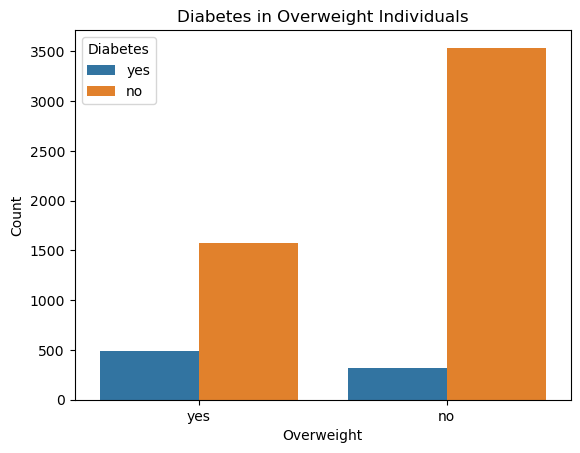

In [36]:

import matplotlib.pyplot as plt

data_diabetes = data_merged.loc[:,['diabetes', 'weight', 'overweight', 'age']]

data_diabetes = data_diabetes[((data_diabetes['diabetes'] == 'yes') | (data_diabetes['diabetes'] == 'no')) & (data_diabetes['overweight'] != 'unknown')]

# sns.countplot(data_diabetes, x= 'overweight', y='diabetes')

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_diabetes, x='overweight', hue='diabetes')
plt.title('Diabetes in Overweight Individuals')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()

In [37]:
missing = data_merged.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


walk_<10_minutes_p_day        7823
ldl                           6845
triaclyglycerole              6821
sport_days                    6695
insulin                       6623
blood_glucose                 6572
alcoholic_drinks              6165
alkaline_phosphatase          3289
gamma_glutamyl_transferase    3288
sitting_per_day               2857
diastolic_bp                  2399
systolic_bp                   2399
cholesterin_lab               2288
vit_d_lab                     1505
albumine_creatinine_ratio     1264
urinary_creatinine            1264
albumine                      1264
waist_circumference           1231
caffeine                      1217
potassium                     1217
sodium                        1217
zinc                          1217
iron                          1217
vit_e                         1217
vit_d_diet                    1217
vit_c                         1217
vit_b12                       1217
vit_b9                        1217
calcium             

In [38]:
data_merged.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,9544.0,NaN,NaN,NaN,88719.550189,2878.516418,83732.0,86221.75,88726.5,91209.5,93702.0
gender,9544,2,2.0,4868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,9544.0,NaN,NaN,NaN,31.871752,24.686463,0.0,9.0,27.0,53.0,80.0
ethnicity,9544,6,white,2948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_of_birth,9544,3,USA,7407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
cancer,9544,3,no,4945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,9544,4,unknown,7225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcoholic_drinks,3379.0,<NA>,<NA>,<NA>,2.728914,2.334878,0.0,1.0,2.0,3.0,15.0
trouble_sleeping,9544,4,2.0,4476,NaN,NaN,NaN,NaN,NaN,NaN,NaN


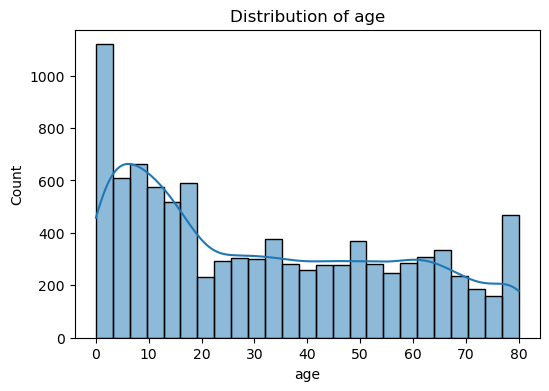

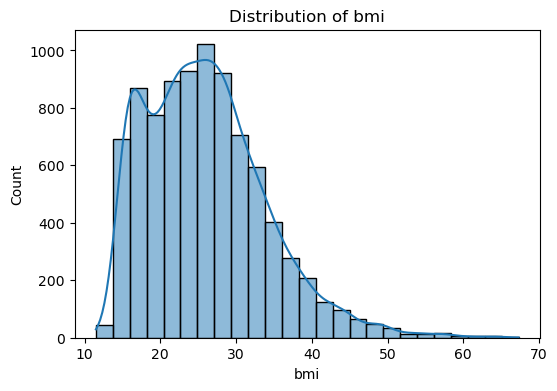

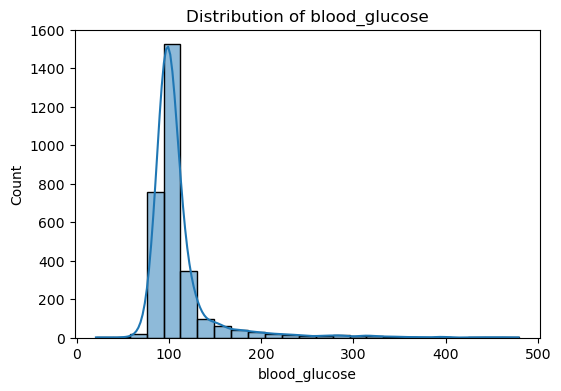

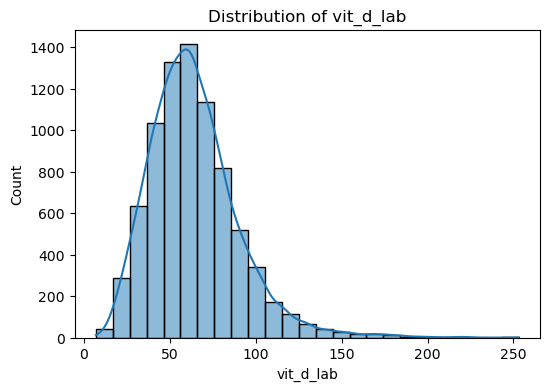

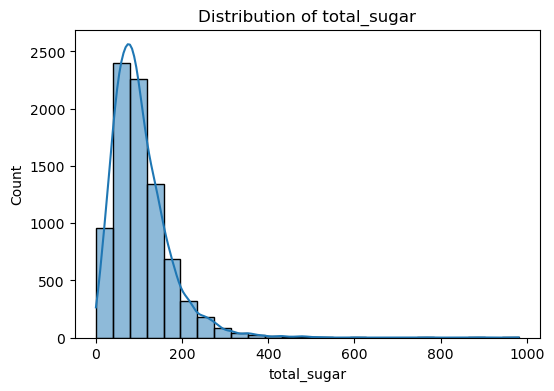

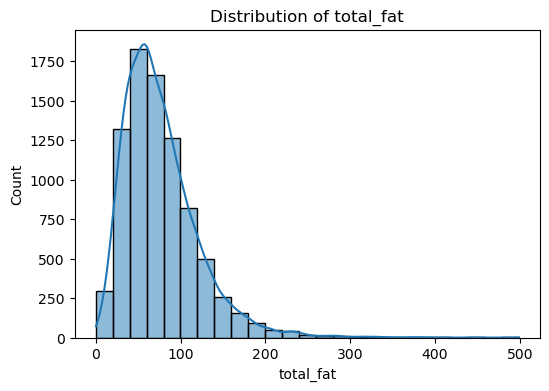

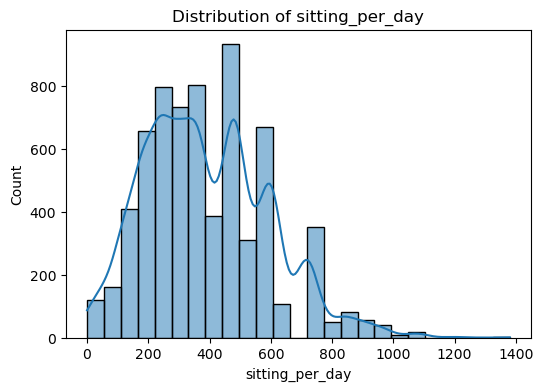

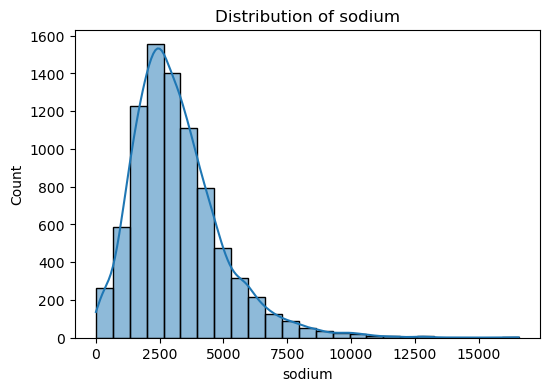

In [39]:

numerical_columns = ['age', 'bmi', 'blood_glucose', 'vit_d_lab', 'total_sugar', 'total_fat', 'sitting_per_day','sodium']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_merged[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


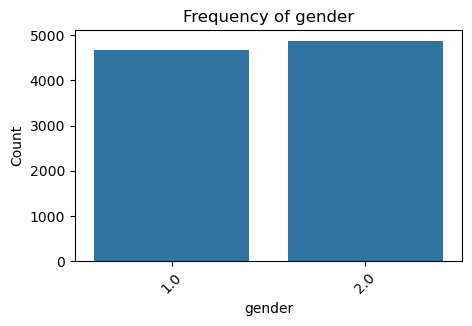

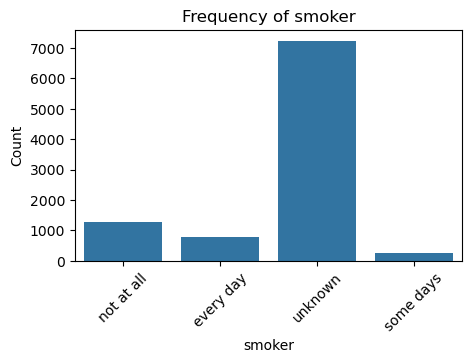

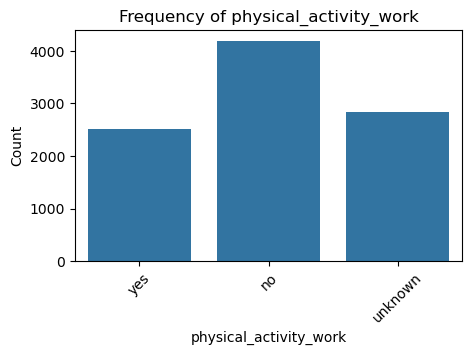

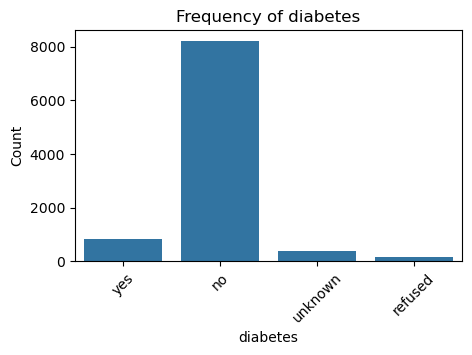

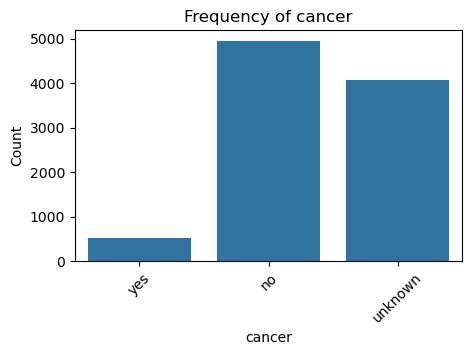

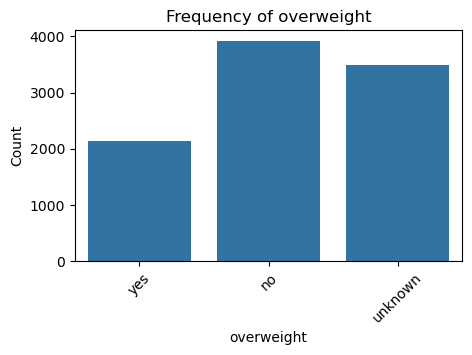

In [40]:
categorical_columns = ['gender', 'smoker', 'physical_activity_work', 'diabetes', 'cancer', 'overweight']

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=data_merged[col])
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


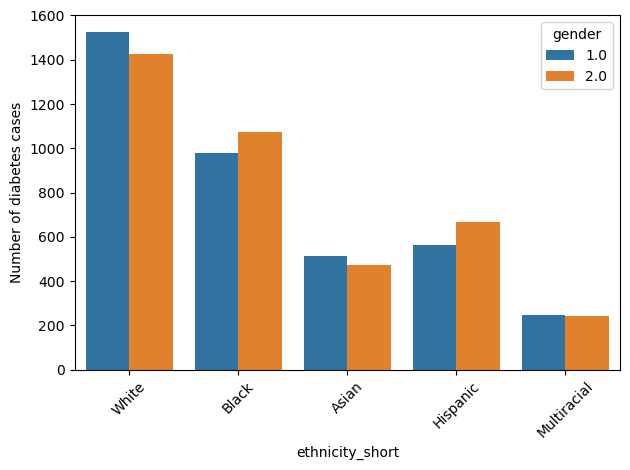

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

ethnicity_map = {
    "white": "White",
    "black": "Black",
    "asian": "Asian",
    "others": "Multiracial",
    "hispanic": "Hispanic",
    "mexican american": "Mexican"
}
subset = data_merged.loc[:, ["ethnicity", "diabetes", "gender"]]

# Neue Spalte mit den gekürzten Labels
subset["ethnicity_short"] = subset["ethnicity"].map(ethnicity_map)
# print(subset)
# Gruppierung vorbereiten
grouped = subset.groupby(["ethnicity_short", "gender"]).size().reset_index(name="diabetes_count")
order = ["White", "Black", "Asian", "Hispanic", "Multiracial"]
cat_type = CategoricalDtype(categories=order, ordered=True)
grouped["ethnicity_short"] = grouped["ethnicity_short"].astype(cat_type)
# Plot
sns.barplot(data=grouped, x="ethnicity_short", y="diabetes_count", hue="gender")
plt.xticks(rotation=45)
plt.ylabel("Number of diabetes cases")
plt.tight_layout()
plt.show()

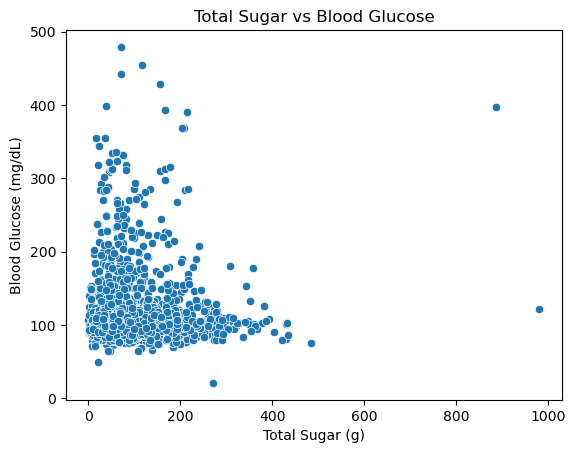

In [42]:
sns.scatterplot(x='total_sugar', y='blood_glucose', data=data_merged)
plt.title('Total Sugar vs Blood Glucose')
plt.xlabel('Total Sugar (g)')
plt.ylabel('Blood Glucose (mg/dL)')
plt.show()

In [43]:
data_merged[['total_sugar', 'blood_glucose']].corr()


,total_sugar,blood_glucose
total_sugar,1.000000,-0.009218
blood_glucose,-0.009218,1.000000


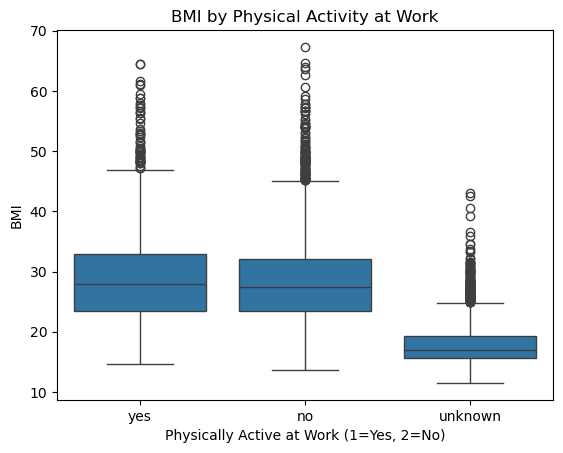

In [44]:
sns.boxplot(x='physical_activity_work', y='bmi', data=data_merged)
plt.title('BMI by Physical Activity at Work')
plt.xlabel('Physically Active at Work (1=Yes, 2=No)')
plt.ylabel('BMI')
plt.show()

In [45]:
from scipy.stats import ttest_ind

active = data_merged[data_merged['physical_activity_work'] == 1]['bmi'].dropna()
inactive = data_merged[data_merged['physical_activity_work'] == 2]['bmi'].dropna()

ttest_ind(active, inactive)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [46]:
data_merged['education_adolescent'] = data_merged['education_adolescent'].map({
    '1.0': '<9th',
    '2.0': '<9th',
    '3.0': '<9th',
    '4.0': '<9th',
    '5.0': '<9th',
    '6.0': '<9th',
    '7.0': '<9th',
    '8.0': '<9th',
    '9.0': '9-11th',
    '10.0': '9-11th',
    '11.0': '9-11th',
    '12.0': '9-11th',
    '13.0': 'HS Grad',
    '14.0': 'GED Grad',
    '15.0': 'some College deg',
    '55.0': '<5th',
    '66.0': '<9th',
    '77.0': 'unknown',
    '99.0': 'unknown'
}).fillna('unknown')

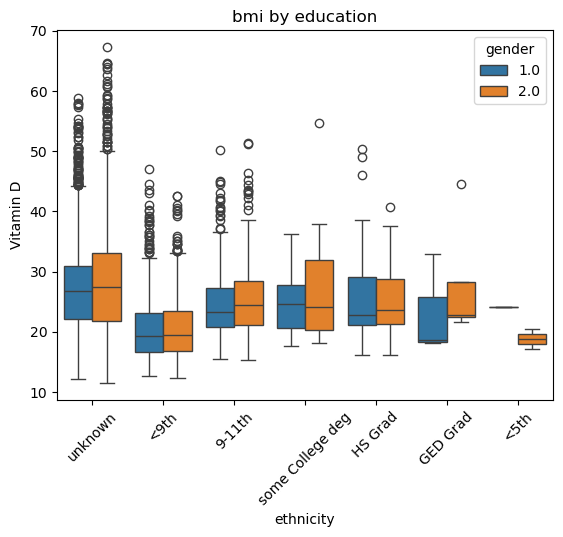

In [47]:
sns.boxplot(x='education_adolescent', y='bmi', data=data_merged, hue='gender')
plt.title('bmi by education')
plt.xlabel('ethnicity')
plt.ylabel('Vitamin D')
plt.xticks(rotation=45)
plt.show()


In [48]:
data_merged.groupby('total_income')['vit_d_lab'].mean().sort_values()


total_income
1.0     54.909811
2.0     59.495652
13.0    60.332174
77.0    60.445833
6.0     61.116863
4.0     61.345333
99.0    61.615888
7.0     62.674899
3.0     63.159875
9.0     63.535490
8.0     64.282985
10.0    64.407908
5.0     64.524809
14.0    64.641453
12.0    70.811628
15.0    71.562696
Name: vit_d_lab, dtype: float64

In [49]:
data_merged['is_overweight'] = data_merged['bmi'] >= 25
data_merged['is_obese'] = data_merged['bmi'] >= 30

overweight_rate = data_merged['is_overweight'].mean()
obese_rate = data_merged['is_obese'].mean()

print(f"Overweight rate: {overweight_rate:.2%}")
print(f"Obesity rate: {obese_rate:.2%}")


Overweight rate: 47.25%
Obesity rate: 25.25%


In [51]:
data_merged['high_glucose'] = (data_merged['blood_glucose'] >= 250) | (data_merged['blood_glucose'] <= 90)
glucose_rate = data_merged['high_glucose'].mean()
print(f"High or low blood glucose rate: {glucose_rate:.2%}")


High or low blood glucose rate: 5.18%


In [52]:
data_merged['is_sedentary'] = data_merged['sitting_per_day'] >= 480
sedentary_rate = data_merged['is_sedentary'].mean()
print(f"Sedentary behavior rate: {sedentary_rate:.2%}")

Sedentary behavior rate: 39.24%


In [53]:
# Testing a Hypothese: There is a significant difference between active and non-active lifestyles on Diabetes risk
# H0: There is no relation between bodily activity and diabetes.
# H1: There is a significant relation between bodily activity and diabetes.
subset_df = data_merged.loc[(data_merged['diabetes'] == 'yes') |(data_merged['diabetes'] == 'no')]
subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>120 min/day' if x >= 120 else 'inactive')
pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/1119692955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>120 min/day' if x >= 120 else 'inactive')


diabetes,no,yes
activity_level,,
>120 min/day,460,40
inactive,7740,780


In [54]:
# Testing a Hypothese: There is a significant difference between active and non-active lifestyles on Diabetes risk
# H0: There is no relation between bodily activity and diabetes.
# H1: There is a significant relation between bodily activity and diabetes.
subset_df = data_merged.loc[(data_merged['diabetes'] == 'yes') |(data_merged['diabetes'] == 'no')]
subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>20 min/day' if x >= 20 else 'inactive')
pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/108063144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['activity_level'] = subset_df['sport_days'].apply(lambda x: '>20 min/day' if x >= 20 else 'inactive')


diabetes,no,yes
activity_level,,
>20 min/day,2341,245
inactive,5859,575


In [55]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(subset_df['activity_level'], subset_df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p >= 0.05:
    print(round(p, 2))
    print('There is no significant connection between diabetes and recreational physical activity.')
else:
    print(round(p, 2))
    print('There is a significant connection between recreational physical activity and diabetes')

0.45
There is no significant connection between diabetes and recreational physical activity.


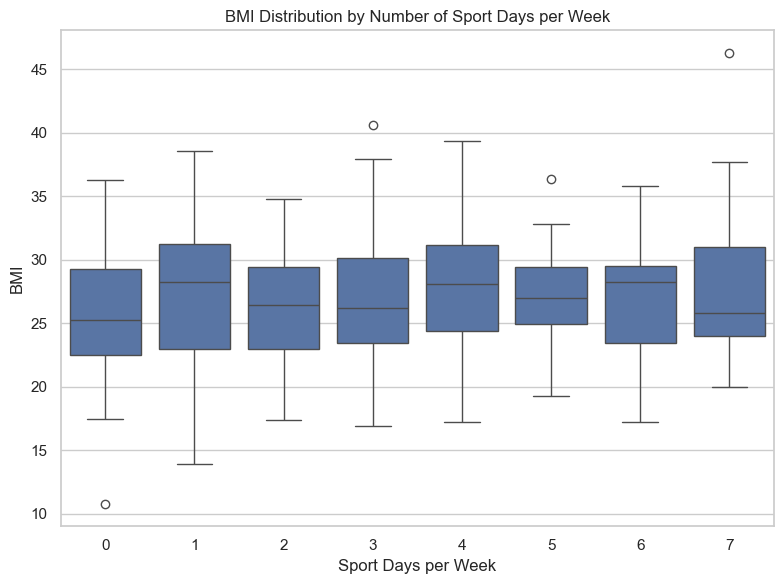

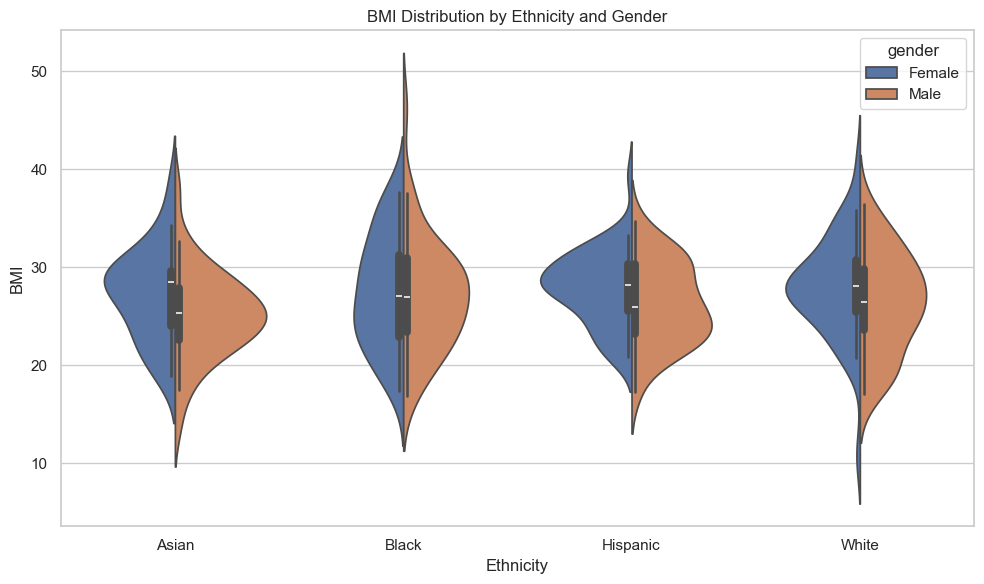

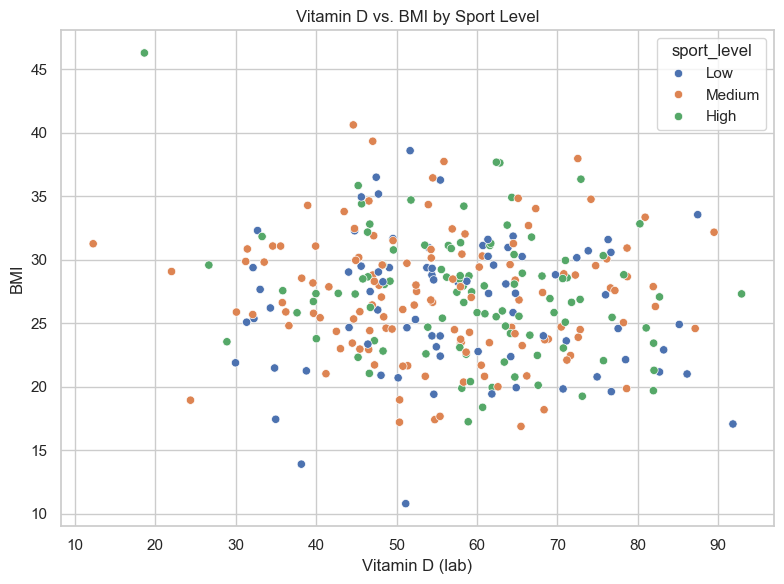

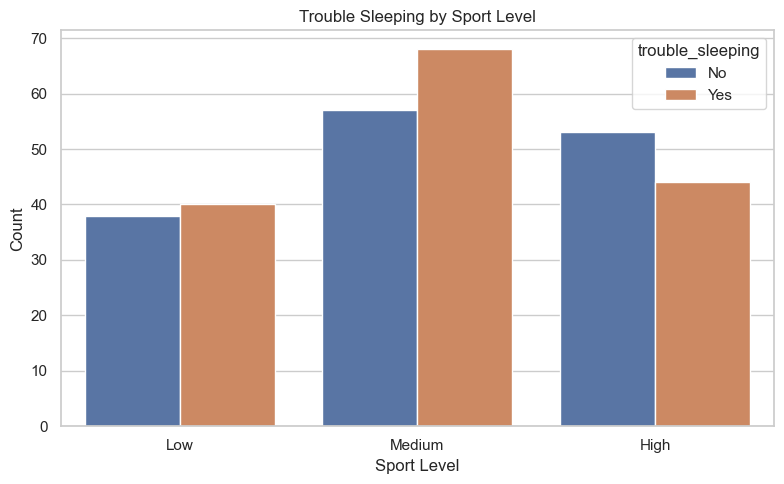

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel-Dummy-Daten erstellen (für Vorschau der Visualisierungen)
import numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'bmi': np.random.normal(27, 5, 300),
    'sport_days': np.random.randint(0, 8, 300),
    'gender': np.random.choice(['Male', 'Female'], 300),
    'ethnicity': np.random.choice(['White', 'Black', 'Hispanic', 'Asian'], 300),
    'age_group': np.random.choice(['<20', '20–39', '40–59', '60–80'], 300),
    'vit_d_lab': np.random.normal(55, 15, 300),
    'trouble_sleeping': np.random.choice(['Yes', 'No'], 300)
})

# Stil setzen
sns.set(style="whitegrid")

# 1. Boxplot: BMI nach Aktivitätstagen
plt.figure(figsize=(8, 6))
sns.boxplot(x='sport_days', y='bmi', data=df)
plt.title("BMI Distribution by Number of Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 2. Violinplot: BMI nach Geschlecht und Ethnie
plt.figure(figsize=(10, 6))
sns.violinplot(x='ethnicity', y='bmi', hue='gender', data=df, split=True)
plt.title("BMI Distribution by Ethnicity and Gender")
plt.xlabel("Ethnicity")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 3. Scatterplot: Vitamin D vs. BMI (farbig nach Sportlevel)
df['sport_level'] = pd.cut(df['sport_days'], bins=[-1, 1, 4, 7], labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='vit_d_lab', y='bmi', hue='sport_level', data=df)
plt.title("Vitamin D vs. BMI by Sport Level")
plt.xlabel("Vitamin D (lab)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 4. Countplot: Schlafprobleme nach Aktivitätsniveau
plt.figure(figsize=(8, 5))
sns.countplot(x='sport_level', hue='trouble_sleeping', data=df)
plt.title("Trouble Sleeping by Sport Level")
plt.xlabel("Sport Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


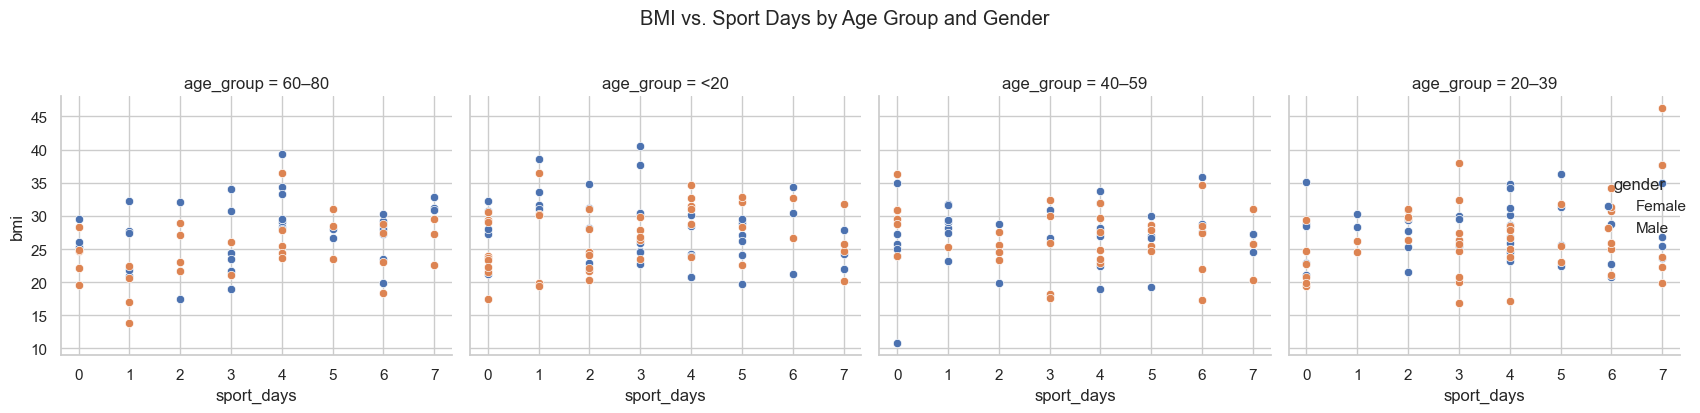

ValueError: Could not interpret value `sport_days` for `x`. Value is a string, but `data` was not passed.

<Figure size 800x600 with 0 Axes>

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Datenbasis aufbereiten für alle Analysen
df['trouble_sleeping_bin'] = df['trouble_sleeping'].map({'Yes': 1, 'No': 0})
df['sport_level'] = pd.cut(df['sport_days'], bins=[-1, 1, 4, 7], labels=['Low', 'Medium', 'High'])

# 1. Bewegung & BMI nach Altersgruppe und Geschlecht
g = sns.FacetGrid(df, col='age_group', hue='gender', height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='sport_days', y='bmi')
g.add_legend()
g.fig.suptitle("BMI vs. Sport Days by Age Group and Gender", y=1.03)
plt.tight_layout()
plt.show()

# 2. Clusteranalyse: Gesundheitsprofile
features = ['sport_days', 'bmi', 'vit_d_lab', 'trouble_sleeping_bin']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sport_days', y='bmi', hue=df['cluster'], palette='Set2')
plt.title("K-Means Clustering: Sport Days vs. BMI")
plt.xlabel("Sport Days per Week")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 3. BMI vs. Bewegung + Schlafprobleme
plt.figure(figsize=(8, 6))
sns.boxplot(x='sport_level', y='bmi', hue='trouble_sleeping', data=df)
plt.title("BMI by Sport Level and Trouble Sleeping")
plt.xlabel("Sport Level")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 4. Interaktive BMI-Karte (Ethnie vs. Bewegung, farbig nach Vitamin D)
fig = go.Figure(data=[
    go.Scatter(
        x=df['ethnicity'],
        y=df['sport_days'],
        mode='markers',
        marker=dict(
            size=df['bmi'],
            color=df['vit_d_lab'],
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title='Vitamin D')
        ),
        text=[f"BMI: {b:.1f}" for b in df['bmi']],
    )
])
fig.update_layout(title="BMI by Ethnicity and Sport Days (Colored by Vitamin D)",
                  xaxis_title="Ethnicity",
                  yaxis_title="Sport Days")
fig.show()

# 5. Sankey-Daten vorbereiten
from collections import Counter

# Beispielhafte simple Sankey-Daten (nur zur Demo)
sources = ['Inactive', 'Inactive', 'Trouble Sleeping']
targets = ['Trouble Sleeping', 'High BMI', 'High BMI']
values = [100, 80, 60]

label_list = list(set(sources + targets))
label_map = {name: i for i, name in enumerate(label_list)}
source_ids = [label_map[s] for s in sources]
target_ids = [label_map[t] for t in targets]

sankey_fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=label_list),
    link=dict(source=source_ids, target=target_ids, value=values)
)])
sankey_fig.update_layout(title_text="Sankey Diagram: Inactivity → Sleep Issues → High BMI", font_size=10)
sankey_fig.show()


/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3363121763.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='sport_level', y='bmi', data=df, estimator=np.mean, ci='sd')


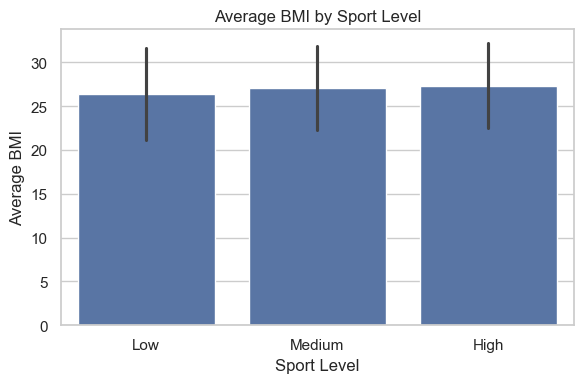

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3363121763.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_sport = df.groupby('sport_level')['trouble_sleeping_bin'].mean().reset_index()


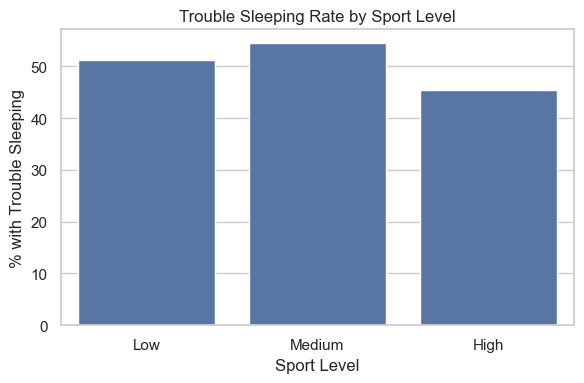

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3363121763.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='sport_level', y='vit_d_lab', data=df, estimator=np.mean, ci='sd')


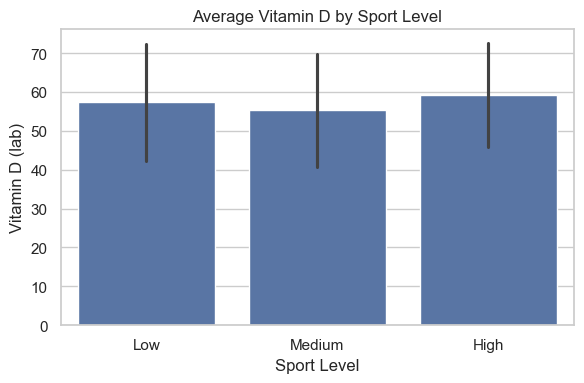

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3363121763.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='age_group', y='bmi', data=df, estimator=np.mean, ci='sd', order=['<20', '20–39', '40–59', '60–80'])


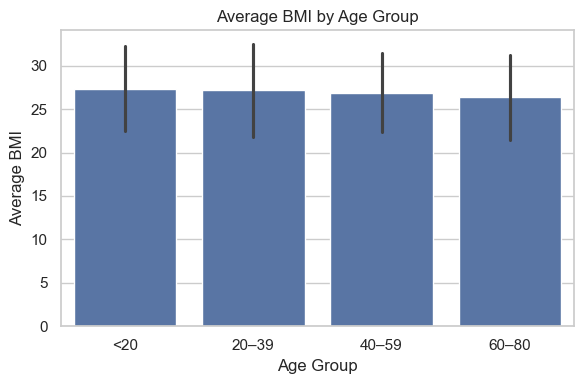

In [66]:
# Einfachere, aber erkenntnisreiche Plots auf Basis der wichtigsten Variablen

# 1. Durchschnittlicher BMI nach Sportlevel
plt.figure(figsize=(6, 4))
sns.barplot(x='sport_level', y='bmi', data=df, estimator=np.mean, ci='sd')
plt.title("Average BMI by Sport Level")
plt.xlabel("Sport Level")
plt.ylabel("Average BMI")
plt.tight_layout()
plt.show()

# 2. Anteil an Schlafproblemen nach Sportlevel (in %)
sleep_sport = df.groupby('sport_level')['trouble_sleeping_bin'].mean().reset_index()
sleep_sport['trouble_sleeping_percent'] = sleep_sport['trouble_sleeping_bin'] * 100

plt.figure(figsize=(6, 4))
sns.barplot(x='sport_level', y='trouble_sleeping_percent', data=sleep_sport)
plt.title("Trouble Sleeping Rate by Sport Level")
plt.ylabel("% with Trouble Sleeping")
plt.xlabel("Sport Level")
plt.tight_layout()
plt.show()

# 3. Durchschnittlicher Vitamin D Wert nach Sportlevel
plt.figure(figsize=(6, 4))
sns.barplot(x='sport_level', y='vit_d_lab', data=df, estimator=np.mean, ci='sd')
plt.title("Average Vitamin D by Sport Level")
plt.xlabel("Sport Level")
plt.ylabel("Vitamin D (lab)")
plt.tight_layout()
plt.show()

# 4. BMI nach Altersgruppe (klarer Balkenplot)
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='bmi', data=df, estimator=np.mean, ci='sd', order=['<20', '20–39', '40–59', '60–80'])
plt.title("Average BMI by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average BMI")
plt.tight_layout()
plt.show()


/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/4153723484.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='sport_days', y='waist_circumference', data=data_merged ,estimator=np.mean, ci='sd')


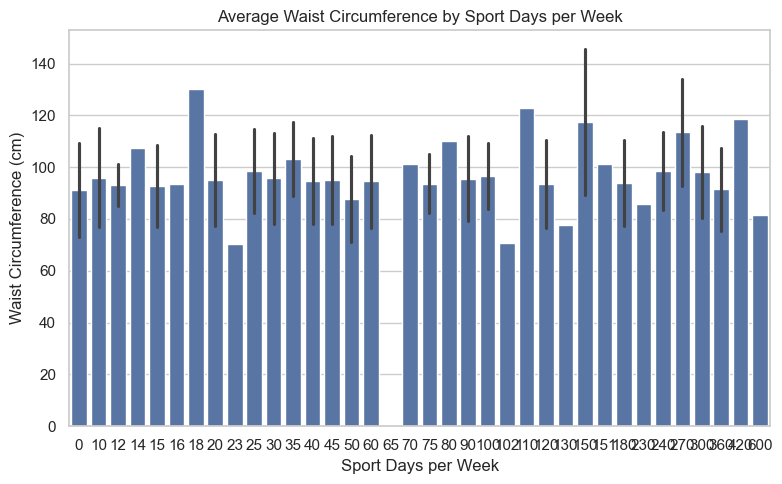

KeyError: 'Column not found: is_overweight'

In [70]:
# Neue Plots mit sensitivere Metriken: waist_circumference, is_overweight, blood_glucose

# 1. Bauchumfang nach Sporttagen
plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='waist_circumference', data=data_merged ,estimator=np.mean, ci='sd')
plt.title("Average Waist Circumference by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("Waist Circumference (cm)")
plt.tight_layout()
plt.show()

# 2. Anteil Übergewichtiger nach Sporttagen
overweight_rate = df.groupby('sport_days')['is_overweight'].mean().reset_index()
overweight_rate['overweight_percent'] = overweight_rate['is_overweight'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='overweight_percent', data=overweight_rate)
plt.title("Overweight Rate by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("% Overweight")
plt.tight_layout()
plt.show()

# 3. Durchschnittlicher Blutzucker nach Sporttagen
plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='blood_glucose', data=df, estimator=np.mean, ci='sd')
plt.title("Average Blood Glucose by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("Blood Glucose (mg/dL)")
plt.tight_layout()
plt.show()


In [71]:
data_merged.columns

Index(['ID', 'gender', 'age', 'ethnicity', 'country_of_birth', 'us_citizen',
       'education_adult', 'education_adolescent', 'household_size',
       'no_of_kids_u6', 'no_of_kids_btw_6_17', 'total_income',
       'pregnancy_status', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'mufa', 'pufa', 'cholesterin_diet', 'total_fiber', 'total_alcohol',
       'vit_a', 'vit_b1', 'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12',
       'vit_c', 'vit_d_diet', 'vit_e', 'calcium', 'iron', 'zinc', 'sodium',
       'potassium', 'caffeine', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'pulse',
       'blood_glucose', 'insulin', 'cholesterin_lab', 'triaclyglycerole',
       'ldl', 'gamma_glutamyl_transferase', 'alkaline_phosphatase',
       'vit_d_lab', 'urinary_creatinine', 'albumine',
       'albumine_creatinine_ratio', 'physical_activity_work',
       'sitting_per_day', 'sport_days', 'w

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3320582646.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='sport_days', y='waist_circumference', data=data_merged, estimator=np.mean, ci='sd')


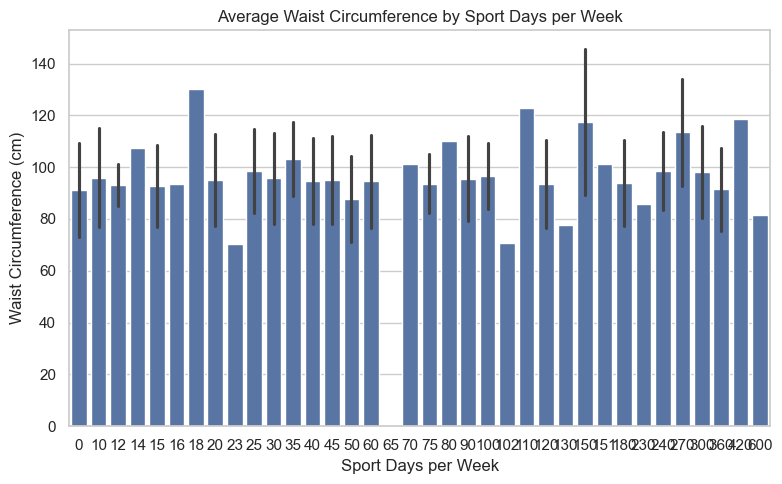

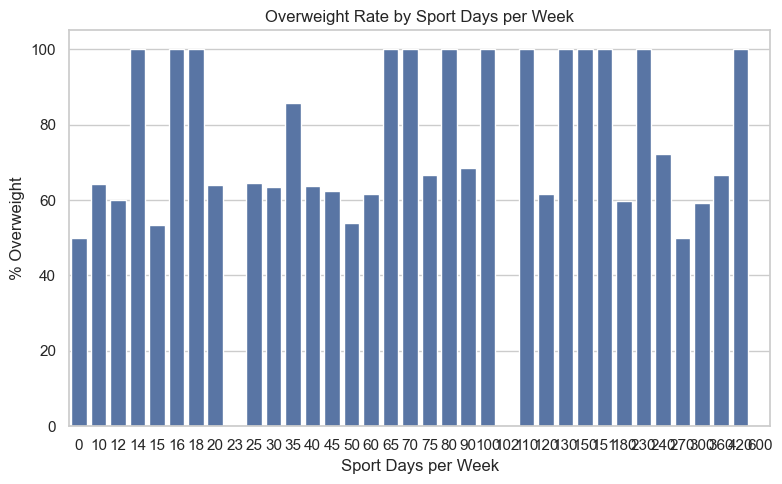

/var/folders/w_/l5_6k0ks44j93c_h19c7c9qh0000gn/T/ipykernel_3432/3320582646.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='sport_days', y='blood_glucose', data=data_merged, estimator=np.mean, ci='sd')


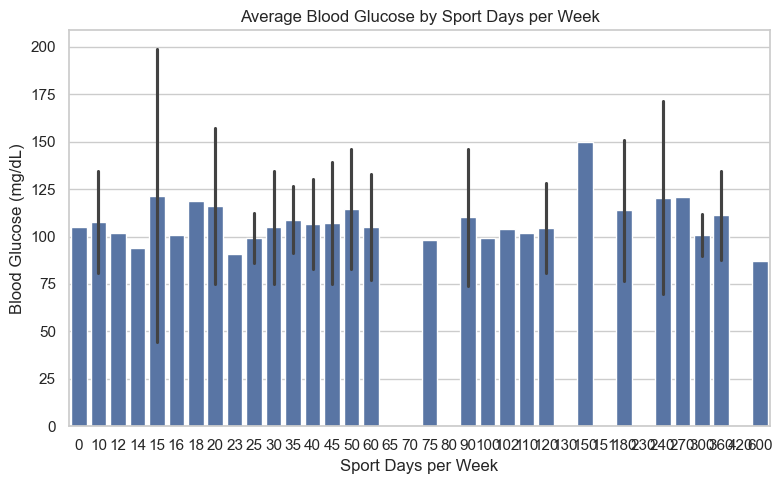

In [72]:
# Jetzt korrekt mit 'data_merged' statt 'df'

# 1. Durchschnittlicher Bauchumfang nach Sporttagen
plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='waist_circumference', data=data_merged, estimator=np.mean, ci='sd')
plt.title("Average Waist Circumference by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("Waist Circumference (cm)")
plt.tight_layout()
plt.show()

# 2. Anteil Übergewichtiger nach Sporttagen
overweight_rate = data_merged.groupby('sport_days')['is_overweight'].mean().reset_index()
overweight_rate['overweight_percent'] = overweight_rate['is_overweight'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='overweight_percent', data=overweight_rate)
plt.title("Overweight Rate by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("% Overweight")
plt.tight_layout()
plt.show()

# 3. Durchschnittlicher Blutzucker nach Sporttagen
plt.figure(figsize=(8, 5))
sns.barplot(x='sport_days', y='blood_glucose', data=data_merged, estimator=np.mean, ci='sd')
plt.title("Average Blood Glucose by Sport Days per Week")
plt.xlabel("Sport Days per Week")
plt.ylabel("Blood Glucose (mg/dL)")
plt.tight_layout()
plt.show()


In [75]:
data_merged.columns

Index(['ID', 'gender', 'age', 'ethnicity', 'country_of_birth', 'us_citizen',
       'education_adult', 'education_adolescent', 'household_size',
       'no_of_kids_u6', 'no_of_kids_btw_6_17', 'total_income',
       'pregnancy_status', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'mufa', 'pufa', 'cholesterin_diet', 'total_fiber', 'total_alcohol',
       'vit_a', 'vit_b1', 'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12',
       'vit_c', 'vit_d_diet', 'vit_e', 'calcium', 'iron', 'zinc', 'sodium',
       'potassium', 'caffeine', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'pulse',
       'blood_glucose', 'insulin', 'cholesterin_lab', 'triaclyglycerole',
       'ldl', 'gamma_glutamyl_transferase', 'alkaline_phosphatase',
       'vit_d_lab', 'urinary_creatinine', 'albumine',
       'albumine_creatinine_ratio', 'physical_activity_work',
       'sitting_per_day', 'sport_days', 'w

In [81]:
g_smokers = data_merged[data_merged['smoker'] == 'yes']['systolic_bp']
g_nonsmokers = data_merged[data_merged['smoker'] == 'no']['systolic_bp']

t_stat, p_val = ttest_ind(g_smokers, g_nonsmokers, nan_policy='omit')
print(f"H4: Smoking ↔ Systolic BP\nT-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

H4: Smoking ↔ Systolic BP
T-statistic: nan, p-value: nan


In [88]:
file_path = "C:/Users/harunabi/Downloads/all_data_13_to_18_202506191217.csv"


In [95]:
import pandas as pd

file_path = "/Users/harunabi/Downloads/all_data_13_to_18_202506191217.csv"
data = pd.read_csv(file_path)
